In [137]:
import  numpy as np
import numpy.linalg as la
from scipy.sparse import random
import scipy.sparse as sparse

In [138]:
def jacobi(A,x,b,max_iter = 100,epsilon = 10e-4):
    print(A.shape)
    D = np.diag(np.diag(A))
    norm_b = la.norm(b)
    print(D.shape)
    D_inv = la.inv(D)
    r_vector = []
    for i in range(max_iter):
        x = x + D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector

In [139]:
def Gauss_Seidal(A,x,b,max_iter = 100,epsilon = 10e-4):
    # todo: understand it better :(
    M = np.tril(A) # represent L + D
    norm_b = la.norm(b)
    M_inv = la.inv(M)
    r_vector = []
    for i in range(max_iter):
        x = x + M_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector


In [140]:
def SD(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * (b - A @ x)
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector

In [141]:
def CG(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    r = b - A @ x
    p = r
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * p
        r_prev = r
        r = b  - A @ x
        r_norm = la.norm(r)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
           break
        beta =   np.inner(r,r) / np.inner(r_prev,r_prev)
        p = r + beta * p

    return x,r_vector

type <class 'numpy.ndarray'>
(256, 256)

(256, 256)
(256, 256)


C:\Users\yuval\AppData\Local\Temp\ipykernel_19676\2162919293.py:9: RuntimeWarning: overflow encountered in matmul
  alpha = (rk @ rk) / (rk @ (A@rk))
C:\Users\yuval\AppData\Local\Temp\ipykernel_19676\2162919293.py:9: RuntimeWarning: invalid value encountered in matmul
  alpha = (rk @ rk) / (rk @ (A@rk))


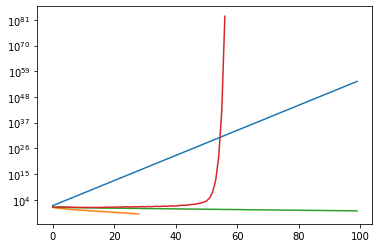

In [142]:
n = 256
A = random(n, n, 5 / n, dtype=float)
v = np.random.rand(n)
v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')
A = A.transpose() * v * A + 0.1*sparse.eye(n)
b = np.random.rand(n)
x_start = np.zeros(n)
A = np.array(A.toarray())
print(f'type {type(A)}')
print(A.shape)
print()

x_jacobi,r_jacobi = jacobi(A,x_start,b)
x_gs, r_gs = Gauss_Seidal(A,x_start,b)
x_sd, r_sd = SD(A,x_start,b)
x_cg, r_cg = CG(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_jacobi)
plt.subplot()
plt.semilogy(r_gs)
plt.semilogy(r_sd)
plt.semilogy(r_cg)

